<a href="https://colab.research.google.com/github/ilev-sergey/deep-learning-school/blob/main/%5Bhomework_4_2_%5Dgame_of_thrones_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

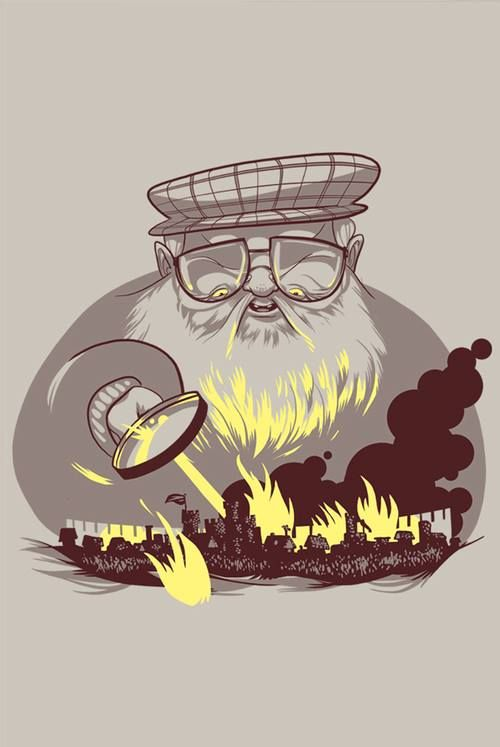

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 69.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 84.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col ="S.No")
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [ ]:
data.drop(columns=["mother", "father", "heir", "spouse"], inplace=True) # drop obviously useless features
data.drop(columns=["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True) # drop columns where most of values are NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   house             1176 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  age               279 non-null    float64
 14  numDeadRelations  1557 non-null   int64  
 15  popularity        1557 non-null   float64
 16  isAlive           1557 non-null   int64  
dtype

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data["isPopular"] = data["popularity"] > 0.5
data["boolDeadRelations"] = data["numDeadRelations"] > 0

data.drop(columns=["popularity", "numDeadRelations"], inplace=True)

In [ ]:
data["culture"].value_counts()[:3]

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45


In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for key, values in cult.items():
    for value in values:
        data.loc[data["culture"].str.lower() == value, "culture"] = key
data["culture"].value_counts()[:3]

,count
culture,
Northmen,103
Ironborn,91
Free Folk,56


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

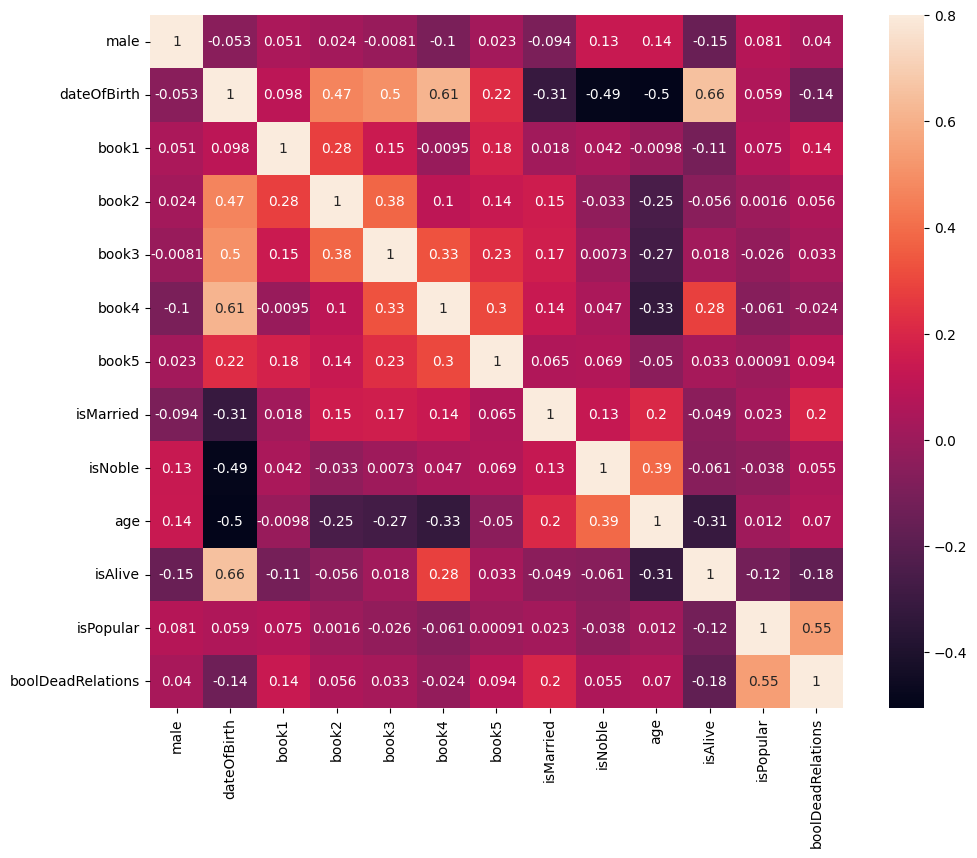

In [ ]:
corrmat = data._get_numeric_data().corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [ ]:
data["dateOfBirth"].unique() # seems like it's day number of the year, so the correlation is strange

array([ nan, 208.,  82., 276., 183., 289., 280., 240., 286., 278.,  94.,
       283., 138., 285., 173., 116., 147., -25.,  74., 290., 284., 246.,
       299., 268., 181., 294., 288., 295., 291., 260., 296., 281., 253.,
       249.,  50.,  26.,  88., 115., 188., 105., 170., 293., 220., 264.,
       251.,  54., 199., 172., 145., 114., 190., 244., 287., 150., 211.,
       196., 171., 123.,  27., 245., 279., 161., 241., 248., 265., 256.,
       282., 160., 229., 263., 271., 292., 236., 254., 252., 255., 277.,
       298., 297., 152., 250., 259.,  90., 230., 266.,  99., 175., 262.,
        48., 258., 261., 184., 269., 237.,  61., 176., 267., 272., 219.,
       191., 110., 247., 228., 275., 109., 164.])

<Axes: >

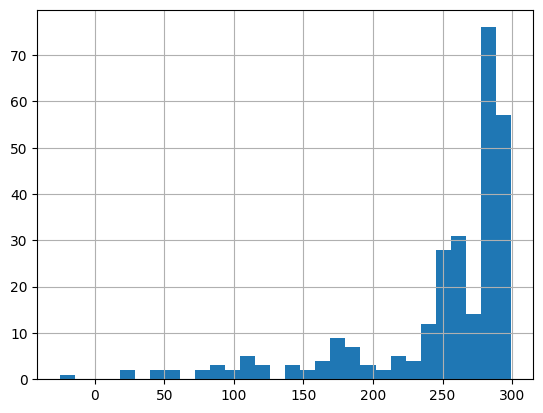

In [ ]:
data["dateOfBirth"].hist(bins=30) # nvm, it's year of birth, could be dropped as we already have age

In [ ]:
data.drop(columns=["name", "dateOfBirth"], inplace = True) # let's also drop name, as it is useless feature

In [ ]:
data['age'] = data['age'].fillna(data['age'].median()) # fill NaNs with median age

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
data["isAlive"] = data["isAlive"].apply(lambda x: bool(x)) # int -> bool for better readability
data["isAlive"].value_counts()

,count
isAlive,
True,1212
False,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
categorical_features = data.select_dtypes(exclude=[float, int, bool]).columns.tolist()
categorical_features

['title', 'culture', 'house']

In [ ]:
data.title.value_counts() # too many options for one-hot encoding

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetport Sound,1
Lord of Greyshield,1
Felwood,1


In [ ]:
frequent_titles = data.title.value_counts().loc[lambda x: x > 10].index
frequent_titles

Index(['Ser', 'Maester', 'Archmaester', 'Lord', 'Septon', 'Winterfell'], dtype='object', name='title')

In [ ]:
data.loc[~data["title"].isin(frequent_titles), "title"] = "Rare" # replace rare titles with one value
data.title.value_counts()

,count
title,
Rare,1151
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15


In [ ]:
data.culture.unique()

array([nan, 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn', 'Free Folk',
       'Northmen', 'Summer Islands', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene', 'Ironmen',
       'Qartheen', 'Lysene', 'Westermen', 'Qohor', 'Westerosi',
       'Norvoshi', 'Meereenese', 'Andal', 'Astapori', 'ironborn',
       'Stormlander', 'Valemen', 'Myrish', 'Lhazareen', 'Sistermen',
       'Northern mountain clans', 'Vale', 'Crannogmen', 'Pentoshi'],
      dtype=object)

In [ ]:
frequent_cultures = data.culture.value_counts().loc[lambda x: x > 10].index
data.loc[~data.culture.isin(frequent_cultures), "culture"] = "Rare" # replace rare cultures with one value
data.culture.value_counts()

,count
culture,
Rare,1144
Northmen,103
Ironborn,91
Free Folk,56
Braavosi,40
Valyrian,28
Dornish,21
Ghiscari,18
Dothraki,17


In [ ]:
len(data.house.unique())

316

In [ ]:
frequent_houses = data.house.value_counts().loc[lambda x: x > 10].index # the same for houses
data.loc[~data.house.isin(frequent_houses), "house"] = "Rare"
data.house.value_counts() # wow, lots of Freys

,count
house,
Rare,1104
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30
House Osgrey,20


In [ ]:
data = pd.get_dummies(data, columns=["title", "house", "culture"]) # one-hot encoding
data.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,...,culture_Dothraki,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Rare,culture_Reach,culture_Vale mountain clans,culture_Valyrian,culture_Westermen
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,24.0,False,...,False,False,False,False,False,True,False,False,False,False
2,1,1,1,1,1,1,1,1,97.0,True,...,False,False,False,False,False,True,False,False,False,False
3,1,0,0,0,1,0,0,1,24.0,True,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,0,0,0,1,1,23.0,False,...,False,False,False,False,False,True,False,False,False,False
5,0,0,0,0,1,0,1,1,29.0,True,...,False,False,False,False,False,False,False,False,False,False


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns="isAlive")
y = data["isAlive"]

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
def fit_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return {model.__class__.__name__: model.predict(X_test)} # method: prediction

In [ ]:
predictions = {}
for model in [AdaBoostClassifier, RandomForestClassifier, GaussianProcessClassifier, GaussianNB, KNeighborsClassifier, SVC, DecisionTreeClassifier]:
    predictions.update(fit_predict(model(), X_train, y_train, X_test))
predictions.update({"LogisticRegression": y_pred})

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
accuracy = {model: accuracy_score(y_test, prediction) for model, prediction in predictions.items()}

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy

{'AdaBoostClassifier': 0.7916666666666666,
 'RandomForestClassifier': 0.7980769230769231,
 'GaussianProcessClassifier': 0.7916666666666666,
 'GaussianNB': 0.4230769230769231,
 'KNeighborsClassifier': 0.7596153846153846,
 'SVC': 0.7724358974358975,
 'DecisionTreeClassifier': 0.7532051282051282,
 'LogisticRegression': 0.7980769230769231}

In [ ]:
{'AdaBoostClassifier': 0.7884615384615384,
 'RandomForestClassifier': 0.7884615384615384,
 'GaussianProcessClassifier': 0.8012820512820513,
 'GaussianNB': 0.38461538461538464,
 'KNeighborsClassifier': 0.7948717948717948,
 'SVC': 0.7788461538461539,
 'DecisionTreeClassifier': 0.75,
 'LogisticRegression': 0.7788461538461539} # with date of birth

 {'AdaBoostClassifier': 0.8205128205128205,
 'RandomForestClassifier': 0.7884615384615384,
 'GaussianProcessClassifier': 0.7948717948717948,
 'GaussianNB': 0.4583333333333333,
 'KNeighborsClassifier': 0.7692307692307693,
 'SVC': 0.782051282051282,
 'DecisionTreeClassifier': 0.7852564102564102,
 'LogisticRegression': 0.7980769230769231} # with age

IndentationError: unexpected indent (<ipython-input-365-f71540b8d606>, line 10)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)